Name: **Muhammad Junaid Aftab**
UID:  **117396188**

# Optional Homework:  MCMC  
In this homework you will create a loss function for a logistic regression.  Unlike your previous homeworks, where you "solved" for the optimal regression parameters using gradient optimization, in this assignment you create a confidence interval for the slope of the separation line between two classes.

In [23]:
from utility import *
import numpy as np
from numpy.random import randn, rand
import matplotlib.pyplot as plt
import scipy.stats as st
np.random.seed(0)

## Create a classification problem in two dimensions
The two classes will be separated by the line
  $$w^Tx = 0$$
where $w$ is a 2-vector.  The slope of this line is given by $m=-w[0]/w[1]$.

The NLL of the initial guess is  111.43392851596919


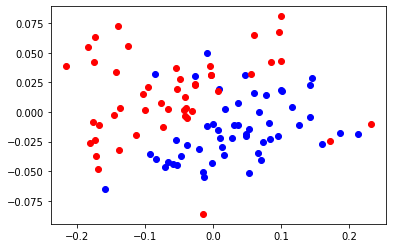

In [24]:
# Create a matrix of data points and a vector of labels
X, y = create_classification_problem(100, 2, cond_number=3)

# Define the logistic loss function, and its gradient
nll = lambda w: logreg_objective(w,X,y)

# An initial guess of the minimizer (may not be close to center of distribution)
# Note: I'm choosing a "bad" initial guess to produce burn-in samples for instructional purposes
w_guess = np.array([[-10],[10]])  

# Test the negative log likelihood function
f = nll(w_guess)
print('The NLL of the initial guess is ', f)
ind = y.ravel()==1
plt.scatter(X[ind,0], X[ind,1], color='blue')
plt.scatter(X[~ind,0], X[~ind,1], color='red')
plt.show()

### Generate many samples from the posterios distribution
Note: the NLL function above generates $-\log(p(w)).$ 

**You will have to fill in the formula for the acceptance probability, alpha.**

In [37]:
iters = 5000 #  number of MCMC samples to draw
sigma = 3 #  sigma for the Guassian proposal distribution

# Counters to keep track of how many rejected and accepted proposals there have been 
reject_count=0;
accept_count=0;

# Arrays to store all the iterates be produced
samps  = np.zeros((iters,2))   # The samples of w from the distribution
slopes = np.zeros((iters,1))   # The slopes of the samples
nlls   = np.zeros((iters,1))   # The NLL values of the samples

# Run the Metropolis sampler 
w = w_guess
for i in range(iters):
    # Make a proposal
    wp = w+sigma*randn(2,1) 
    
    # The acceptance probability
    alpha =  min(1, np.exp(-nll(wp))/np.exp(-nll(w))  )
    
    # Should you accept this sample?
    if rand()<alpha:
        w=wp;
        accept_count = accept_count+1;
    else:
        reject_count=reject_count+1;
        
    # Record sample and associated NLL
    samps[i,:] = w.T
    nlls[i]    = nll(w)
    
print('Accepted proposals: ', accept_count)
print('Rejected proposals: ', reject_count)

Accepted proposals:  3410
Rejected proposals:  1590


### Plot results

NLL values


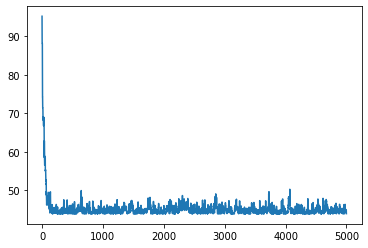

Samples


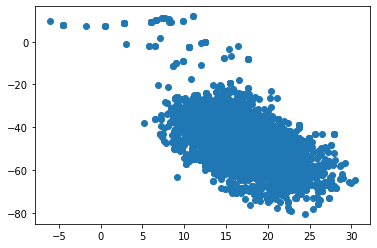

In [38]:
print('NLL values')
plt.plot(nlls)
plt.show()

print('Samples')
plt.scatter(samps[:,0], samps[:,1])
plt.show()

### Remove the burn-in samples

NLL values


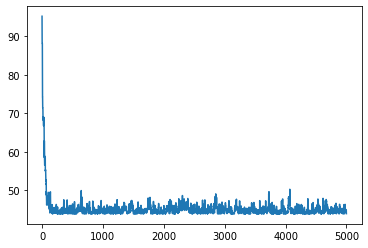

Samples


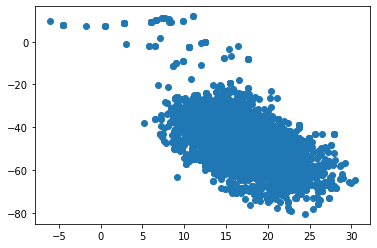

In [39]:
samps_burn = samps[100:,:]
nlls_burn  = nlls[100:]

print('NLL values')
plt.plot(nlls)
plt.show()

print('Samples')
plt.scatter(samps[:,0], samps[:,1])
plt.show()

### Make a 95% confidence interval for the slope of the decision line
Recall that for a weight $w$ the corresponding slope is $-w[0]/w[1].$ Youn should have to write about 5 lines of code to compute the lower and upper bounds.

In [40]:
slopes = np.zeros((len(samps_burn),1))

for i in range(len(samps_burn)):
    
    x = - samps_burn[i][0] / samps_burn[i][1] 
    slopes[i] = - samps_burn[i][0] / samps_burn[i][1] 
    
lower, upper = st.t.interval(alpha=0.95, df=len(slopes)-1, loc=np.mean(slopes), scale=st.sem(slopes)) 
    
print(f'The confidence interval is [{lower[0]}, {upper[0]}]')

The confidence interval is [0.3679280031889095, 0.3726713299709695]


### Try tinkering with the $\sigma$ value in the scripts above

Then answer the following...

#### What happens is sigma is too big?

If sigma is too small (for instance 50), a disproportionallity large number of samples are rejected since the variance is quite large.

#### What happens is sigma is too small?

If sigma is too small (for instance 0.01), a disproportionallity large number of samples are acepted and almost all the samples about the initial guess of $(-10,10)$ are explored.

####  Why did you remove the burn-in samples? 

There are correlations between the inputs selected. Since the initial input was chosen to be quite bad, the initial samples selected are expected to be correlated to the initial bad guess.